
Baixar a imagem de referência

In [ ]:
#https://drive.google.com/file/d/1XWfbuhKtWVtmtAUJu5MdHx3jdIDHyXun/view?usp=sharing
!gdown --id '1XWfbuhKtWVtmtAUJu5MdHx3jdIDHyXun'


Downloading...
From: https://drive.google.com/uc?id=1XWfbuhKtWVtmtAUJu5MdHx3jdIDHyXun
To: /content/meandlaula.png
100% 16.0k/16.0k [00:00<00:00, 13.4MB/s]


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display, clear_output, HTML
from google.colab import files
from base64 import b64encode

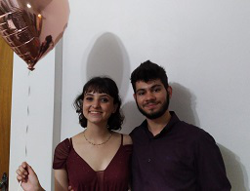

In [ ]:
img_orig = Image.open('meandlaula.png', 'r')
img_orig.thumbnail((250, 250))
display(img_orig)

Retirar o canal de Alfa (transparência) 

In [ ]:
y_hat = np.asarray(img_orig, dtype=int)[ :, :, :3 ]

In [ ]:
y_hat.shape 

(191, 250, 3)

In [ ]:
BACKGROUND_COLOR = tuple( [ int(x) for x in np.mean( np.mean(y_hat, axis=0), axis=0) ] )

W, H, C = y_hat.shape 

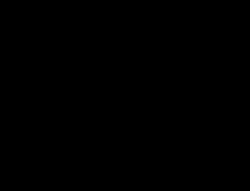

In [ ]:
img_new = Image.new('RGB', (H,W) )
display(img_new)

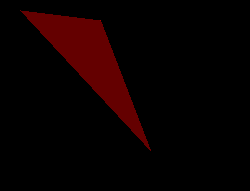

In [ ]:
drw = ImageDraw.Draw(img_new, "RGBA")
drw.polygon( [(20,10),(150,150), (100,20)], fill=(255, 0, 0, 100))
display(img_new)

In [ ]:
y = np.asarray( img_new, dtype=int)

In [ ]:
err = np.sum( ( ( y - y_hat )**2 ) / (W*H*C) )
err 

21998.782568935425

In [ ]:
def create_individual( w, h, triangles = 100 ):
  chromosome = list()
  for _ in range(triangles):               # Criação dos triangulos
    for _ in range(3):                    # Cada vértice em cada triangulo
      x = int ( np.random.rand() * w )    # Width aleatório de inicio 
      y = int ( np.random.rand() * h )    # Heigth aleatório de inicio 
      chromosome += [x, y]
    r, g, b, a = [ int(np.random.rand()*255) for _ in range(4)  ]
    a = int((a/255)*64)
    chromosome += [r, g, b, a]
  return chromosome, None 

In [ ]:
create_individual(10,20,1)

([1, 4, 5, 11, 9, 13, 127, 234, 148, 30], None)

In [ ]:
def create_population(size, w, h):
  population = list()
  for _ in range(size):
    population.append( create_individual(w,h) )
  return population 

In [ ]:
create_population(2,150,150)

[([25,
   38,
   124,
   16,
   16,
   113,
   231,
   121,
   139,
   58,
   103,
   115,
   143,
   118,
   2,
   62,
   42,
   42,
   202,
   56,
   95,
   40,
   123,
   8,
   62,
   32,
   66,
   75,
   15,
   49,
   110,
   59,
   117,
   135,
   31,
   126,
   207,
   225,
   186,
   44,
   24,
   17,
   138,
   9,
   28,
   79,
   236,
   18,
   249,
   28,
   34,
   78,
   94,
   2,
   72,
   100,
   115,
   132,
   127,
   30,
   76,
   104,
   0,
   95,
   82,
   74,
   149,
   221,
   197,
   23,
   136,
   81,
   2,
   9,
   61,
   35,
   157,
   218,
   46,
   12,
   66,
   90,
   47,
   106,
   28,
   67,
   86,
   46,
   105,
   37,
   45,
   148,
   96,
   141,
   116,
   136,
   27,
   230,
   178,
   1,
   0,
   130,
   90,
   47,
   146,
   49,
   173,
   167,
   159,
   40,
   69,
   98,
   37,
   54,
   106,
   1,
   78,
   92,
   182,
   10,
   143,
   40,
   138,
   106,
   149,
   135,
   126,
   1,
   217,
   7,
   36,
   134,
   18,
   87,
   115,
   126,
   

In [ ]:
def get_phenotype( chromosome, triangles = 100):
  chromosome = chromosome.copy()
  img = Image.new('RGB', (H,W), BACKGROUND_COLOR )
  drw = ImageDraw.Draw(img,   'RGBA')

  for _ in range(triangles):
    triangle = list()
    for _ in range(3):
      x = chromosome.pop(0)
      y = chromosome.pop(0)
      triangle.append((y,x))
    r = chromosome.pop(0)
    g = chromosome.pop(0)
    b = chromosome.pop(0)
    a = chromosome.pop(0)
    drw.polygon(triangle, fill=(r,g,b,a) )
  return img 

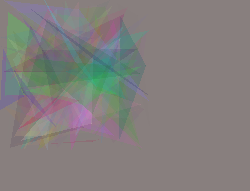

In [ ]:
cr, _ = create_individual(150,150)
img_new = get_phenotype(cr)
display(img_new)

In [ ]:
def fitness(y, y_hat):
  diff = (y - y_hat)**2 
  err = np.sum(diff) / (y.shape[0]*y.shape[1]*y.shape[2])
  return err 

In [ ]:
print( fitness( y, y_hat ) )

21998.78256893543


In [ ]:
def crossover(chr1, chr2):
  idx = np.random.randint(0, len(chr1))
  new_chr1 = chr1[ :idx] + chr2[idx: ]
  new_chr2 = chr2[ :idx] + chr1[idx: ]
  
  return new_chr1, new_chr2 

In [ ]:
def crossover2point(chr1, chr2):
  idx1 = np.random.randint(0, len(chr1))
  idx2 = np.random.randint(0, len(chr1))
  if idx1 > idx2:
    idx1, idx2 = idx2, idx1 
  
  new_chr1 = chr1[:idx1] + chr2[idx1:idx2] + chr1[idx2:]
  new_chr2 = chr2[:idx1] + chr1[idx1:idx2] + chr2[idx2:]

  return new_chr1, new_chr2 


In [ ]:
def mutation(chr, n, w, h):
  l = len(chr)
  p = l*n 
  tot = int( np.random.normal(p, p/2) )
  if tot < 0:
    tot = 0 
  elif tot > l:
    tot = l 
  
  for _ in range(tot):
    idx = np.random.randint(0, l)
    if (idx % 10) < 6: 
      if idx % 2 :
        chr[idx] = int( np.random.rand() * w )   
      else: 
        chr[idx] = int( np.random.rand() * h )
    elif (idx % 10) < 9 :
        chr[idx] = int ( np.random.rand() * 255 ) 
    else : 
        chr[idx] = int ( np.random.rand() * 64 )
  
  return chr 

In [ ]:
def compute_fitness(population, y_hat):
  scored = list()
  for chr, score in population:
    if score is None:
      img = get_phenotype(chr)
      y = np.asarray(img, dtype=int)
      score = fitness(y, y_hat)
    scored.append((chr, score))
  scored.sort(key=lambda x:x[1])
  return scored

In [ ]:
def roulette(population):
  fitnesses = [1 / fitness for _, fitness in population]
  total = np.sum(fitnesses)
  choice = np.random.rand()*total
  subtotal = 0
  idx = 0
  for fitness in fitnesses:
    subtotal += fitness
    if subtotal >= choice:
      break
    idx += 1
  return idx

In [ ]:
def new_generation(population, size, mutation_rate, w, h):
  new_population = list()
  while len(new_population) < size:
    chr1, _ = population[roulette(population)]
    chr2, _ = population[roulette(population)]
    new_chr1, new_chr2 = crossover2point(chr1, chr2)
    new_chr1 = mutation(new_chr1, mutation_rate, w, h)
    new_chr2 = mutation(new_chr2, mutation_rate, w, h)
    new_population.append((new_chr1, None))
    new_population.append((new_chr2, None))
  return new_population[:size]


In [ ]:
def genalg(w, h, y_hat, pop_size, elite_size, epochs, mutation_rate):
  count = 0 
  imgs = list()
  
  x, y = list(), list()
  
  population = create_population(pop_size, w, h)
  
  for generation in range( epochs + 1 ):
    population = compute_fitness( population, y_hat )
    if generation % int(epochs/100) == 0:
      chr, fit = population[0]
      img_gen = get_phenotype(chr)
      imgs.append(img_gen)
      y.append(fit)
      x.append(generation)
      count += 1 
      clear_output()
      print("Geração: ", generation, ", melhor: ", fit)
      display(img_orig)
      display(img_gen)
      plt.plot(x,y)
      plt.show()

    elite = population[:elite_size]
    population = new_generation(population, pop_size - elite_size, mutation_rate, w, h) + elite 
  
  return imgs, x, y 

Geração:  100 , melhor:  4237.491602094241


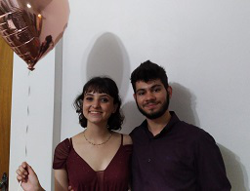

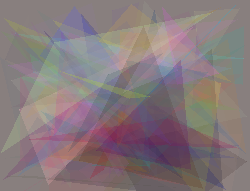

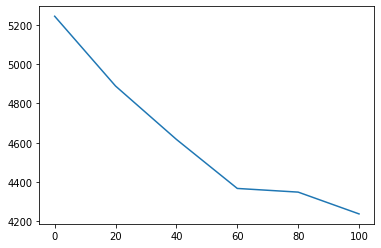

In [ ]:
imgs,x,y = genalg( W, H, y_hat, 50, 1, 20000, 0.0025)